In [1]:
# First, you need to install Qiskit. You can do this by running the following command:
pip install qiskit

SyntaxError: invalid syntax (<ipython-input-1-149ba4a2594b>, line 2)

ML dependency of qiskit

In [ ]:
pip install qiskit-machine-learning

Onnce Qiskit is installed, you can proceed with building a regression model. For simplicity, let's assume you want to build a linear regression model. The steps involved would be:

-  Import the necessary libraries.
- Generate or load your dataset. (In this example, we'll use a synthetic dataset from Qiskit)
- Prepare the quantum feature map.
- Define your quantum instance.
- Build and train the quantum support vector regression (QSVM) algorithm.
- Make predictions using the trained model.
- Evaluate the performance of the model.

## Import the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

 - we have imported all quantum instance and quantum based machine learning dependencies.

# Basic Regression 

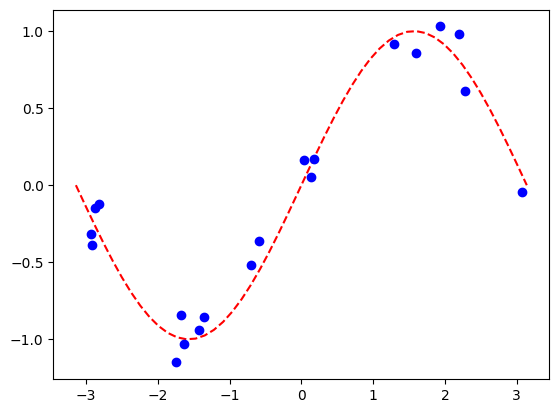

In [2]:
# We create a sample regression dataset with 20 samples 0.2 epochs
num_samples = 20
eps = 0.2
# set the slope of from -pi to +pi (-3.142 to 3.142) for two samples of training and testing as lb,ub
lb, ub = -np.pi, np.pi

# Create target feature X as 1 column and 50 rows
X_ = np.linspace(lb, ub, num=50).reshape(50, 1)
# Create a lamda function f to use to create a Y variable to use with X
f = lambda x: np.sin(x)

# Add extra data to X using random data generator with sub fucntionality of the Qiskit library of algorithm_globals.random
X = (ub - lb) * algorithm_globals.random.random([num_samples, 1]) + lb

# Create Y feature using function in f with extra data generated from 
# the sub fucntionality of the Qiskit library of algorithm_globals.random
y = f(X[:, 0]) + eps * (2 * algorithm_globals.random.random(num_samples) - 1)

# Plot training and testing
plt.plot(X_, f(X_), "r--")
plt.plot(X, y, "bo")
plt.show()

- Seems the slope matches our calculation of a double Qudratic slope seeing we had set the X range from -pi to +pi (-3.142 to 3.142)

# Regression with an EstimatorQNN

 feature maps and other advanced methods are used for advanced prediction with quantum nueral networks (QNN)

In [3]:
# construct simple feature map using Qiskit inbuilt datasets
param_x = Parameter("x")
feature_map = QuantumCircuit(1, name="fm")
feature_map.ry(param_x, 0)

# construct simple ansatz Qiskit inbuilt datasets
param_y = Parameter("y")
ansatz = QuantumCircuit(1, name="vf")
ansatz.ry(param_y, 0)

# construct a circuit
qc = QuantumCircuit(1)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)

# construct QNN
regression_estimator_qnn = EstimatorQNN(
    circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters
)

# we create a callback graph for computing nodes
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [4]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(
    neural_network=regression_estimator_qnn,
    loss="squared_error",
    optimizer=L_BFGS_B(maxiter=5),
    callback=callback_graph,
)

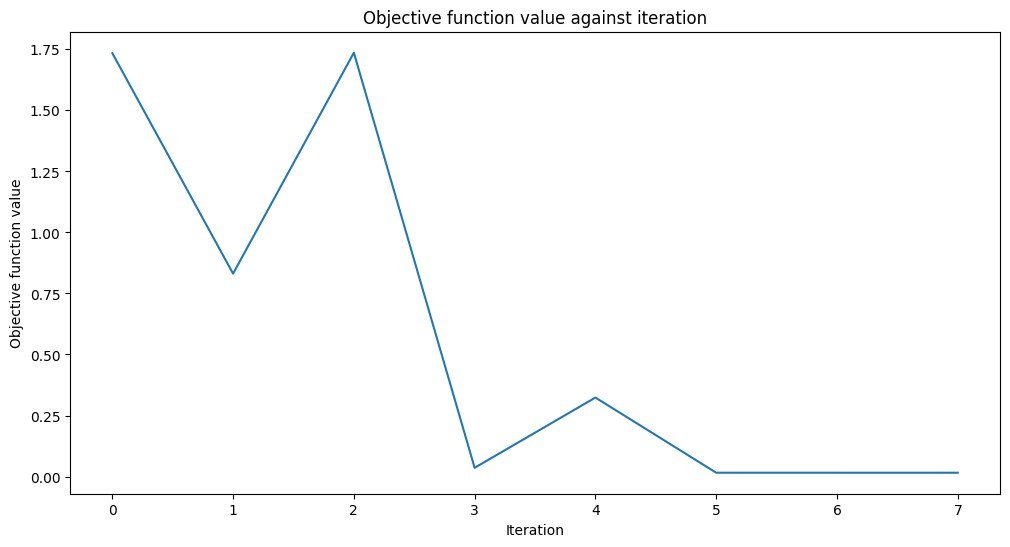

0.9658870161776884

In [5]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit to data
regressor.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score the result
regressor.score(X, y)

- we achieved a 95% regression score on our model as the data was inbuilt without errors but couldnt reach 100% due to computational limitations

# Clustering with Qiskit

Here's a general outline of how you might approach clustering using Qiskit Aqua and classical machine learning techniques:

- Preprocessing the Data:
Just like in classical clustering, you need to preprocess your data. This might involve scaling, normalizing, or transforming your data to make it suitable for analysis.

- Choosing a Quantum Algorithm:
Qiskit Aqua provides several quantum algorithms that can be used for various tasks, including clustering. One such algorithm is the Quantum Variational Eigensolver (QVE), which can be adapted for clustering tasks.

- Encoding Data Quantumly:
Instead of directly applying classical data to the quantum algorithm, you need to encode the data into quantum states. This can be done using techniques like amplitude encoding or quantum feature maps.

- Designing the Quantum Circuit:
Design a quantum circuit that performs the encoding of data and possibly some quantum operations that capture the essence of the clustering task.

- Variational Optimization:
For quantum algorithms like QVE, you'll typically set up a variational form that contains adjustable parameters. The optimization process aims to find the optimal parameters that minimize a cost function related to the clustering task.

- Post-processing and Visualization:
Once the quantum algorithm has been executed and the parameters optimized, you'll need to extract meaningful clustering information from the quantum state. This might involve measuring qubits and performing classical post-processing.

- Comparison and Validation:
It's important to compare the results of your quantum-enhanced clustering with classical clustering methods. Additionally, you might want to validate your results using internal or external cluster evaluation metrics.

- Implementing Classical Post-Processing:
After obtaining the results, you can apply classical post-processing steps like assigning data points to clusters based on the quantum states' measurements.

In [6]:
pip install qiskit.optimization

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install qiskit-optimization

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [15]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, Aer

In [16]:
from docplex.mp.model import Model

from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.translators import from_docplex_mp

from qiskit.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit.algorithms.minimum_eigensolvers import QAOA, VQE
from qiskit.algorithms.optimizers import SPSA, COBYLA

In [17]:
# new version of RYRZ(wave function) is ZZfeaturemap
from qiskit.circuit.library import ZZFeatureMap
from sklearn.datasets import make_blobs

# Simulated Quantum Backend
backend = Aer.get_backend('statevector_simulator')

# Generate sample data
data, _ = make_blobs(n_samples=100, centers=3, random_state=42)

In [18]:
# Encode data quantumly (simplified example)
def quantum_state_encoding(circuit, data):
    # Encode data using amplitude encoding
    for i, point in enumerate(data):
        for j, feature in enumerate(point):
            circuit.ry(feature, qubit=j)

# Create a quantum circuit
num_qubits = len(data[2])
num_data_points = len(data)
qc = QuantumCircuit(num_qubits, num_qubits)
quantum_state_encoding(qc, data)

In [19]:
# Define a variational form
var_form = ZZFeatureMap(num_qubits)

# Define the cost function
def cost_function(params):
    circuit = qc.copy()
    circuit = var_form.construct_circuit(params, circuit)
    job = assemble(transpile(circuit, backend=backend))
    result = backend.run(job).result()
    statevector = result.get_statevector()
    
    # Calculate some measure of the cost based on quantum statevector
    
    return cost

In [85]:
pip install qiskit-optimization[cplex]

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 43.3 MB 40.7 MB/s eta 0:00:01     |████████████████                | 21.6 MB 10.9 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [20]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import CplexOptimizer
# Run a Quadratic Problem
problem = QuadraticProgram()
problem.binary_var('x1')
problem.binary_var('x2')
problem.binary_var('x3')
problem.minimize(linear={'x1': 1, 'x2': -2, 'x3': 3})
print([var.name for var in problem.variables])

['x1', 'x2', 'x3']


In [21]:
#Optimizer
optimizer = CplexOptimizer()
result = optimizer.solve(problem)
print(result.variable_names)
print(result.x)
print(result[1])
print(result['x1'])
print(result.fval)
print(result.variables_dict)

['x1', 'x2', 'x3']
[0. 1. 0.]
1.0
0.0
-2.0
{'x1': 0.0, 'x2': 1.0, 'x3': 0.0}
